In [ ]:
import csv
import numpy as np
import pprint
import matplotlib.pyplot as plt

# np.random.seed(0)
# Read data from CSV file
data = []
with open('Data.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

# Convert data to numpy array
X = np.array(data[1:], dtype=int)


In [ ]:
# Define a function to create a 3D list
def ThreeD(a, b, c):
    return [[[0] * a for _ in range(b)] for _ in range(c)]

In [ ]:
# Initialize 3D lists for conditional probabilities
con_prob_sex = ThreeD(2, 3, 4)
con_prob_age = ThreeD(3, 2, 4)
con_prob_edu = ThreeD(4, 2, 3)

In [ ]:
# Populate conditional probability matrices
for i in X:
    con_prob_sex[i[2]][i[1] - 1][i[0] - 1] += 1
    con_prob_age[i[2]][i[0] - 1][i[1] - 1] += 1
    con_prob_edu[i[1] - 1][i[0] - 1][i[2]] += 1


In [ ]:
# Normalize values and round to 2 decimal places
for matrix in (con_prob_sex, con_prob_age, con_prob_edu):
    for i in matrix:
        for j in i:
            total = sum(j)
            if total:
                for idx in range(len(j)):
                    j[idx] = round((j[idx] / total) + (j[idx - 1] if idx else 0), 2)

In [ ]:

# Print the resulting probability matrices
sex_labels = {1: "Male(1)", 2: "Female(2)"}
age_labels = {1: "Below 22 years(1) ", 2: "22-60 years(2)", 3: "Above 60 years(3)"}
edu_labels = {0: "No formal education(0)", 1: "Primary education(1)", 2: "Secondary education(2)", 3: "Graduation and above(3)"}

In [ ]:
import pandas as pd

print("Conditional Probability of Sex Given Age and Education:")
for idx, layer in enumerate(con_prob_sex):
    print("\nHighest Education Level: " + edu_labels[idx])
    df = pd.DataFrame(layer, index=[age_labels[i+1] for i in range(len(layer))], columns=[sex_labels[i+1] for i in range(len(layer[0]))])
    df_styled = df.style.format('{:.2f}').background_gradient(cmap='YlGnBu', axis=None)
    display(df_styled)

Conditional Probability of Sex Given Age and Education:

Highest Education Level: No formal education(0)


,Male(1),Female(2)
Below 22 years(1),0.68,1.00
22-60 years(2),0.10,1.00
Above 60 years(3),0.33,1.00



Highest Education Level: Primary education(1)


,Male(1),Female(2)
Below 22 years(1),0.39,1.00
22-60 years(2),0.25,1.00
Above 60 years(3),0.00,0.00



Highest Education Level: Secondary education(2)


,Male(1),Female(2)
Below 22 years(1),0.46,1.00
22-60 years(2),0.61,1.00
Above 60 years(3),0.75,1.00



Highest Education Level: Graduation and above(3)


,Male(1),Female(2)
Below 22 years(1),0.60,1.00
22-60 years(2),0.47,1.00
Above 60 years(3),0.00,0.00


In [ ]:
print("\nConditional Probability of Age Given Sex and Education:")
for idx, layer in enumerate(con_prob_age):
    print("\nHighest Education Level: " + edu_labels[idx])
    df = pd.DataFrame(layer, index=[sex_labels[i+1] for i in range(len(layer))], columns=[age_labels[i+1] for i in range(len(layer[0]))])
    df_styled = df.style.format('{:.2f}').background_gradient(cmap='YlGnBu', axis=None)
    display(df_styled)


Conditional Probability of Age Given Sex and Education:

Highest Education Level: No formal education(0)


,Below 22 years(1),22-60 years(2),Above 60 years(3)
Male(1),0.87,0.94,1.01
Female(2),0.35,0.88,1.00



Highest Education Level: Primary education(1)


,Below 22 years(1),22-60 years(2),Above 60 years(3)
Male(1),0.78,1.00,1.00
Female(2),0.65,1.00,1.00



Highest Education Level: Secondary education(2)


,Below 22 years(1),22-60 years(2),Above 60 years(3)
Male(1),0.19,0.89,1.00
Female(2),0.32,0.95,1.00



Highest Education Level: Graduation and above(3)


,Below 22 years(1),22-60 years(2),Above 60 years(3)
Male(1),0.27,1.00,1.00
Female(2),0.18,1.00,1.00


In [ ]:
print("\nConditional Probability of Education Given Sex and Age:")
for idx, layer in enumerate(con_prob_edu):
    print("\nAge group: " + age_labels[idx+1])
    df = pd.DataFrame(layer, index=[sex_labels[i+1] for i in range(len(layer))], columns=[edu_labels[i] for i in range(len(layer[0]))])
    df_styled = df.style.format('{:.2f}').background_gradient(cmap='YlGnBu', axis=None)
    display(df_styled)



Conditional Probability of Education Given Sex and Age:

Age group: Below 22 years(1) 


,No formal education(0),Primary education(1),Secondary education(2),Graduation and above(3)
Male(1),0.35,0.54,0.84,1.00
Female(2),0.18,0.50,0.88,1.00



Age group: 22-60 years(2)


,No formal education(0),Primary education(1),Secondary education(2),Graduation and above(3)
Male(1),0.02,0.05,0.73,1.00
Female(2),0.15,0.25,0.69,1.00



Age group: Above 60 years(3)


,No formal education(0),Primary education(1),Secondary education(2),Graduation and above(3)
Male(1),0.14,0.14,1.00,1.00
Female(2),0.50,0.50,1.00,1.00


In [ ]:
def pick_sex(age,edu):
  # Function to sample sex based on age and education.
  # Args:
  #     age (int): Age category (1, 2, or 3).
  #     edu (int): Education level (0, 1, 2, or 3).

  # Returns:
  #     int: Sampled sex (1 for Male, 2 for Female).
  # Based on age and education, pick sex using conditional probabilities

  p = np.random.random()  # Random number between [0.0, 1.0)


  if age == 1 and edu == 0:
    if p < con_prob_sex[0][0][0]: return 1
    else: return 2
  elif age == 1 and edu == 1:
    if p < con_prob_sex[1][0][0]: return 1
    else: return 2
  elif age == 1 and edu == 2:
    if p < con_prob_sex[2][0][0]: return 1
    else: return 2
  elif age == 1 and edu == 3:
    if p < con_prob_sex[3][0][0]: return 1
    else: return 2

  elif age == 2 and edu == 0:
    if p < con_prob_sex[0][1][0]: return 1
    else: return 2
  elif age == 2 and edu == 1:
    if p < con_prob_sex[1][1][0]: return 1
    else: return 2
  elif age == 2 and edu == 2:
    if p < con_prob_sex[2][1][0]: return 1
    else: return 2
  elif age == 2 and edu == 3:
    if p < con_prob_sex[3][1][0]: return 1
    else: return 2

  elif age == 3 and edu == 0:
    if p < con_prob_sex[0][2][0]: return 1
    else: return 2
  elif age == 3 and edu == 1:
    if p < con_prob_sex[1][2][0]: return 1
    else: return 2
  elif age == 3 and edu == 2:
    if p < con_prob_sex[2][2][0]: return 1
    else: return 2
  elif age == 3 and edu == 3:
    if p < con_prob_sex[3][2][0]: return 1
    else: return 2

In [ ]:
def pick_age(sex,edu):
  # Function to sample age based on sex and education.
  # Args:
  #     sex (int): Sex (1 for Male, 2 for Female).
  #     edu (int): Education level (0, 1, 2, or 3).
  # Returns:
  #     int: Sampled age category (1, 2, or 3).
  # Based on sex and education, pick age using conditional probabilities

  p = np.random.random()  # Random number between [0.0, 1.0)

  if sex == 1 and edu == 0:
    if p < con_prob_age[0][0][0]: return 1
    elif p < con_prob_age[0][0][1]: return 2
    else: return 3
  elif sex == 1 and edu == 1:
    if p < con_prob_age[1][0][0]: return 1
    elif p < con_prob_age[1][0][1]: return 2
    else: return 3
  elif sex == 1 and edu == 2:
    if p < con_prob_age[2][0][0]: return 1
    elif p < con_prob_age[2][0][1]: return 2
    else: return 3
  elif sex == 1 and edu == 3:
    if p < con_prob_age[3][0][0]: return 1
    elif p < con_prob_age[3][0][1]: return 2
    else: return 3

  elif sex == 2 and edu == 0:
    if p < con_prob_age[0][1][0]: return 1
    elif p < con_prob_age[0][1][1]: return 2
    else: return 3
  elif sex == 2 and edu == 1:
    if p < con_prob_age[1][1][0]: return 1
    elif p < con_prob_age[1][1][1]: return 2
    else: return 3
  elif sex == 2 and edu == 2:
    if p < con_prob_age[2][1][0]: return 1
    elif p < con_prob_age[2][1][1]: return 2
    else: return 3
  elif sex == 2 and edu == 3:
    if p < con_prob_age[3][1][0]: return 1
    elif p < con_prob_age[3][1][1]: return 2
    else: return 3

In [ ]:
def pick_edu(sex,age):

  # Function to sample education based on sex and age.

  # Args:
  #     sex (int): Sex (1 for Male, 2 for Female).
  #     age (int): Age category (1, 2, or 3).

  # Returns:
  #     int: Sampled education level (0, 1, 2, or 3).
  # Based on sex and age, pick education using conditional probabilities

  p = np.random.random()  # Random number between [0.0, 1.0)

  if sex == 1 and age == 1:
    if p < con_prob_edu[0][0][0]: return 0
    elif p < con_prob_edu[0][0][1]: return 1
    elif p < con_prob_edu[0][0][2]: return 2
    else: return 3
  elif sex == 1 and age == 2:
    if p < con_prob_edu[1][0][0]: return 0
    elif p < con_prob_edu[1][0][1]: return 1
    elif p < con_prob_edu[1][0][2]: return 2
    else: return 3
  elif sex == 1 and age == 3:
    if p < con_prob_edu[2][0][0]: return 0
    elif p < con_prob_edu[2][0][1]: return 1
    elif p < con_prob_edu[2][0][2]: return 2
    else: return 3

  elif sex == 2 and age == 1:
    if p < con_prob_edu[0][1][0]: return 0
    elif p < con_prob_edu[0][1][1]: return 1
    elif p < con_prob_edu[0][1][2]: return 2
    else: return 3
  elif sex == 2 and age == 2:
    if p < con_prob_edu[1][1][0]: return 0
    elif p < con_prob_edu[1][1][1]: return 1
    elif p < con_prob_edu[1][1][2]: return 2
    else: return 3
  elif sex == 2 and age == 3:
    if p < con_prob_edu[2][1][0]: return 0
    elif p < con_prob_edu[2][1][1]: return 1
    elif p < con_prob_edu[2][1][2]: return 2
    else: return 3

In [ ]:
def gibbs_sample(n=1000, thin=500):
  # Function to perform Gibbs sampling.

  # Args:
  #     n (int): Number of iterations.
  #     thin (int): Thinning parameter for better mixing.

  s = 1  # Initial values for sex, age, and education
  a = 1
  e = 1
  sex_syn = []  # Lists to store synthesized data
  age_syn = []
  edu_syn = []
  for i in range(n):  # Iterate for 'n' iterations
      for j in range(thin):  # Thin the samples for better mixing
          s = pick_sex(a, e)  # Sample sex
          a = pick_age(s, e)  # Sample age
          e = pick_edu(s, a)  # Sample education
      sex_syn.append(s)  # Append synthesized sex data
      age_syn.append(a)  # Append synthesized age data
      edu_syn.append(e)  # Append synthesized education data

  # Count occurrences of each unique value in synthesized data
  unique_sex, counts_sex = np.unique(sex_syn, return_counts=True)
  unique_age, counts_age = np.unique(age_syn, return_counts=True)
  unique_edu, counts_edu = np.unique(edu_syn, return_counts=True)

  # Create dictionaries mapping unique values to their respective counts
  ans_sex = dict(zip(unique_sex, counts_sex))
  ans_age = dict(zip(unique_age, counts_age))
  ans_edu = dict(zip(unique_edu, counts_edu))

  return ans_sex,ans_age,ans_edu

In [ ]:
# Call the Gibbs sampling function with specified parameters
no_of_observations = 10
true_value_sex = [25324, 24676]
true_values_age = [17955, 29642, 2403]
true_values_edu = [7490, 5655, 24400, 12455]

observed_sex = [[], []]
observed_age = [[], [], []]
observed_edu = [[], [], [], []]

for _ in range(no_of_observations):
    ans_sex, ans_age, ans_edu = gibbs_sample(50000, 10)
    for i, ans in enumerate([ans_sex, ans_age, ans_edu]):
        for j, val in enumerate(ans.values()):
            if i == 0:
                observed_sex[j].append(val)
            elif i == 1:
                observed_age[j].append(val)
            else:
                observed_edu[j].append(val)


In [ ]:
import pandas as pd

# Define true values
true_value_sex = [25324, 24676]
true_values_age = [17955, 29642, 2403]
true_values_edu = [7490, 5655, 24400, 12455]

# Define observed values
obs_value_sex = [ans_sex[1], ans_sex[2]]
obs_values_age = [ans_age[1], ans_age[2], ans_age[3]]
obs_values_edu = [ans_edu[0], ans_edu[1], ans_edu[2], ans_edu[3]]

# Define categories
categories_sex = ['Male', 'Female']
categories_age = ['Below 22 years', '22-60 years', 'Above 60 years']
categories_edu = ['No formal education', 'Primary education', 'Secondary education', 'Graduation and above']

# Calculate percentage error function
def calculate_percentage_error(true_value, observed_value):
    return round((abs((observed_value - true_value) / true_value) * 100), 2)  # Round to two decimal places

# Create a DataFrame for the table
data = {
    'Variable': ['\033\033Sex\033'] + [''] * (len(categories_sex) - 1) +
                ['\033\033Age\033'] + [''] * (len(categories_age) - 1) +
                ['\033\033Education\033'] + [''] * (len(categories_edu) - 1),
    'Category': categories_sex + categories_age + categories_edu,
    'True Values': true_value_sex + true_values_age + true_values_edu,
    'Observed Values': obs_value_sex + obs_values_age + obs_values_edu
}

# Calculate percentage error
data['Percentage Error (%)'] = [calculate_percentage_error(true, obs) for true, obs in zip(data['True Values'], data['Observed Values'])]

# Create DataFrame
df = pd.DataFrame(data)

# Round values to two decimals and remove extra zeros
df['True Values'] = df['True Values'].round(2).astype(str).replace(r'\.0+$', '', regex=True)
df['Observed Values'] = df['Observed Values'].round(2).astype(str).replace(r'\.0+$', '', regex=True)
df['Percentage Error (%)'] = df['Percentage Error (%)'].round(2).astype(str).replace(r'\.0+$', '', regex=True)

# Set style for the DataFrame
styled_df = df.style.applymap(lambda x: 'color: blue', subset=['Variable']).applymap(lambda x: 'color: purple', subset=['Category'])

# Display the styled DataFrame
styled_df


,Variable,Category,True Values,Observed Values,Percentage Error (%)
0,Sex,Male,25324,26058,2.9
1,,Female,24676,23942,2.97
2,Age,Below 22 years,17955,17586,2.06
3,,22-60 years,29642,29546,0.32
4,,Above 60 years,2403,2868,19.35
5,Education,No formal education,7490,8006,6.89
6,,Primary education,5655,6356,12.4
7,,Secondary education,24400,24592,0.79
8,,Graduation and above,12455,11046,11.31


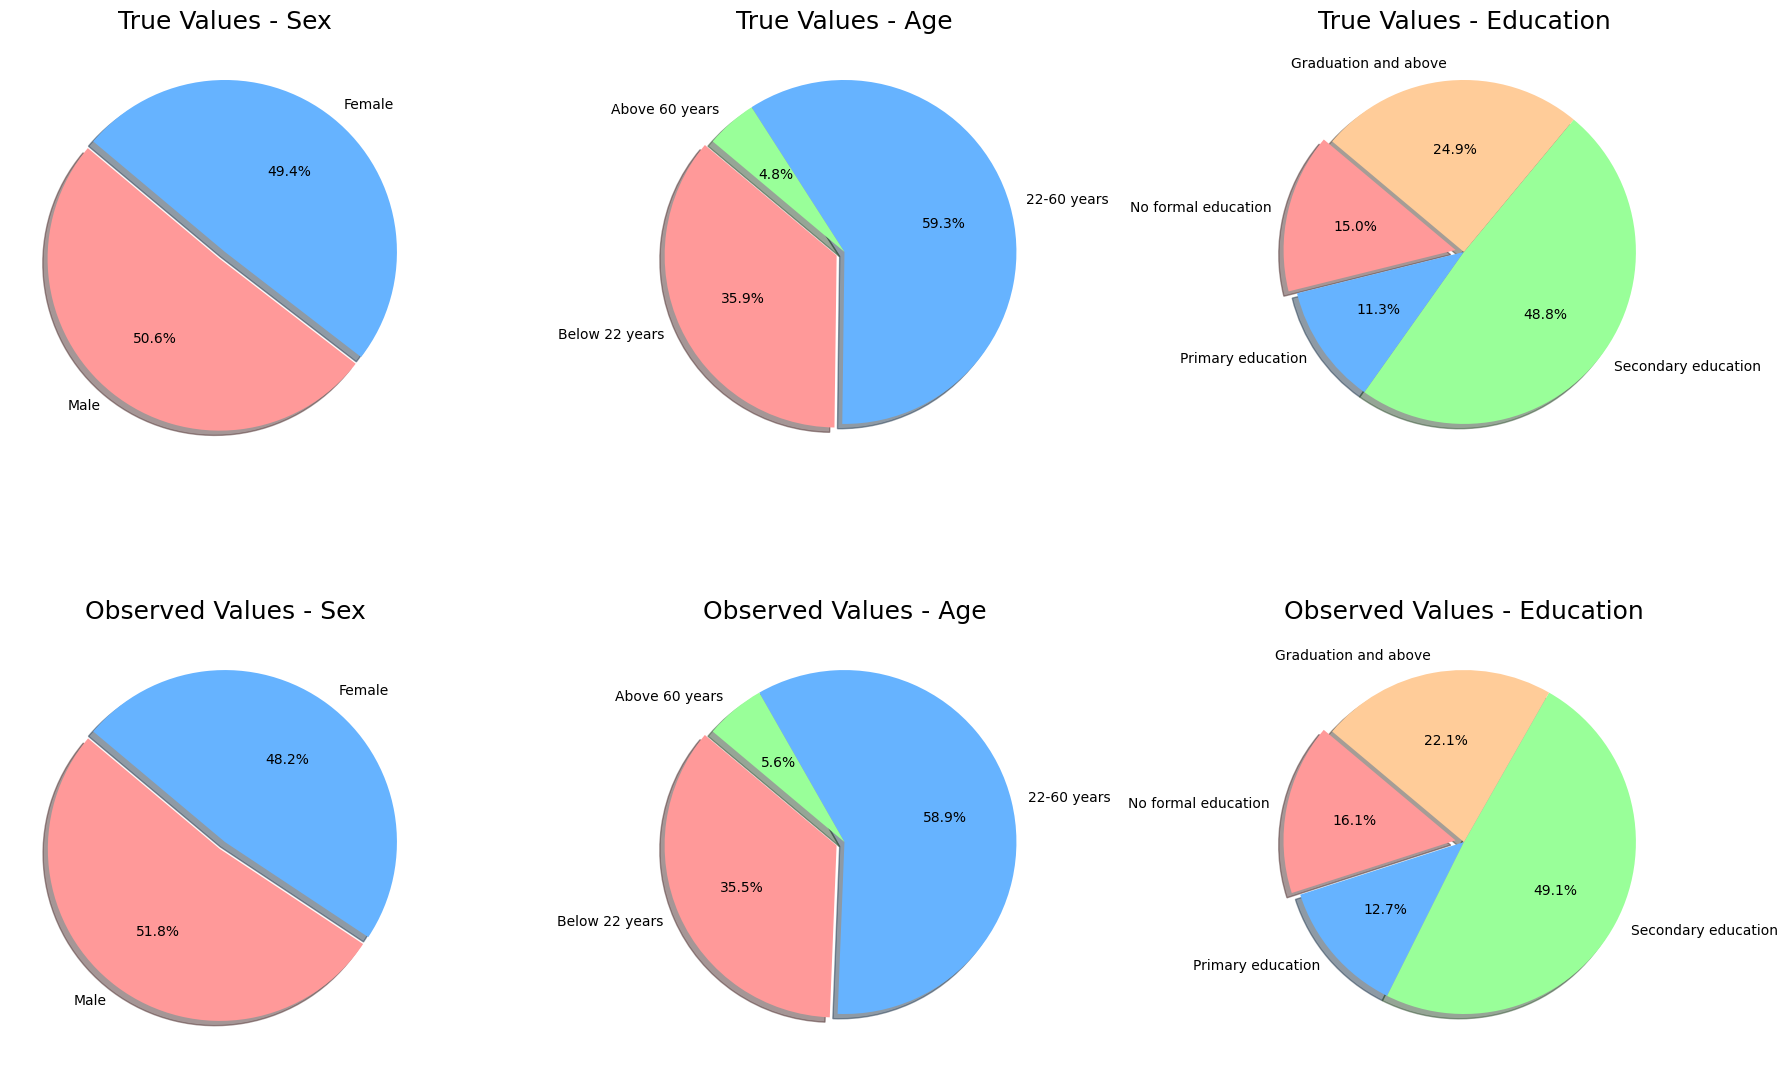

In [ ]:
import matplotlib.pyplot as plt

# Create subplots for pie charts
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Define color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Plot pie charts for sex
axs[0, 0].pie(true_value_sex, labels=['Male', 'Female'][:len(true_value_sex)], autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=(0.05, 0))
axs[0, 0].set_title('True Values - Sex', fontsize=18)

axs[1, 0].pie([sum(x) for x in observed_sex], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=(0.05, 0))
axs[1, 0].set_title('Observed Values - Sex', fontsize=18)

# Plot pie charts for age
axs[0, 1].pie(true_values_age, labels=['Below 22 years','22-60 years','Above 60 years'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=(0.05, 0, 0))
axs[0, 1].set_title('True Values - Age', fontsize=18)

axs[1, 1].pie([sum(x) for x in observed_age], labels=['Below 22 years','22-60 years','Above 60 years'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=(0.05, 0, 0))
axs[1, 1].set_title('Observed Values - Age', fontsize=18)

# Plot pie charts for education
axs[0, 2].pie(true_values_edu, labels=['No formal education','Primary education','Secondary education','Graduation and above'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=(0.05, 0, 0, 0))
axs[0, 2].set_title('True Values - Education', fontsize=18)

axs[1, 2].pie([sum(x) for x in observed_edu],labels=['No formal education','Primary education','Secondary education','Graduation and above'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=(0.05, 0, 0, 0))
axs[1, 2].set_title('Observed Values - Education', fontsize=18)

# Hide the last subplot in the last column if the number of observed education levels is less than 4
if len(observed_edu) < 4:
    axs[1, 2].axis('off')

plt.tight_layout()
plt.show()
